<a href="https://colab.research.google.com/github/farmer-nusantara/farmer-nusantara-machine-learning/blob/master/Paddy_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [12]:
from google.colab import files
import os
import zipfile
import shutil
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
import pandas as pd
import seaborn as sb


# **Data Imports**

Source Dataset from Kaggle :

[Paddy Dataset 1](https://www.kaggle.com/competitions/paddy-disease-classification/data)

[Paddy Dataset 2](https://www.kaggle.com/datasets/badhon7432/paddyleafdiseaseuci)

In [2]:
! pip install kaggle

files.upload()

#create folder named kaggle
! mkdir ~/.kaggle

#copy kaggle.json into kaggle folder
! cp kaggle.json ~/.kaggle/

#chance permissions so that only you can read-write
! chmod 600 ~/.kaggle/kaggle.json 

Saving kaggle.json to kaggle.json


## **Downloading Dataset**

In [3]:
!kaggle datasets download -d badhon7432/paddyleafdiseaseuci

!kaggle competitions download -c paddy-disease-classification

 89% 144M/161M [00:00<00:00, 181MB/s]
100% 161M/161M [00:01<00:00, 164MB/s]
 99% 1.01G/1.02G [00:06<00:00, 207MB/s]
100% 1.02G/1.02G [00:06<00:00, 173MB/s]


## **Unzipping Dataset**

In [4]:
file_zip = 'paddy-disease-classification.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('/content/paddy-disease-classification/')
zip_ref.close()

file_zip = 'paddyleafdiseaseuci.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('/content/paddyleafdiseaseuci/')
zip_ref.close()

print(os.listdir('/content/paddy-disease-classification/train_images'))

['blast', 'bacterial_panicle_blight', 'normal', 'downy_mildew', 'hispa', 'brown_spot', 'dead_heart', 'tungro', 'bacterial_leaf_streak', 'bacterial_leaf_blight']


# **Exploratory Data Analysis**

In [5]:
paddyleaf_classname = ['Bacterial Leaf Blight'
                      'Bacterial Leaf Streak'
                      'Bacterial Panicle Blight'
                      'Blast'
                      'Brown Spot'
                      'Dead Heart'
                      'Down Mildew'
                      'Hispa'
                      'Normal'
                      'Tungro']

src_dir = ('/content/paddy-disease-classification/')
root_dir = '/tmp/Data'

In [6]:
listdir_image = os.listdir('/content/paddy-disease-classification/train_images')
print(listdir_image)

['blast', 'bacterial_panicle_blight', 'normal', 'downy_mildew', 'hispa', 'brown_spot', 'dead_heart', 'tungro', 'bacterial_leaf_streak', 'bacterial_leaf_blight']


In [10]:
image_dir ='/content/paddy-disease-classification/train_images'

for  x in listdir_image:
  z = os.path.join(image_dir,x)
  print(x ," : ",len(os.listdir(z)),"Images")

blast  :  1738 Images
bacterial_panicle_blight  :  337 Images
normal  :  1764 Images
downy_mildew  :  620 Images
hispa  :  1594 Images
brown_spot  :  965 Images
dead_heart  :  1442 Images
tungro  :  1088 Images
bacterial_leaf_streak  :  380 Images
bacterial_leaf_blight  :  479 Images


blast
bacterial_panicle_blight
normal
downy_mildew
hispa
brown_spot
dead_heart
tungro
bacterial_leaf_streak
bacterial_leaf_blight


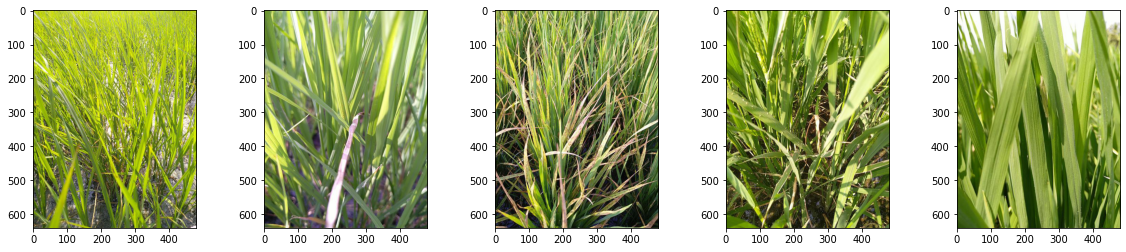

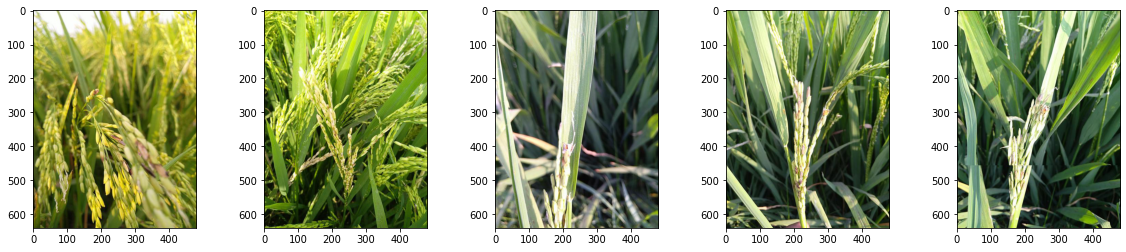

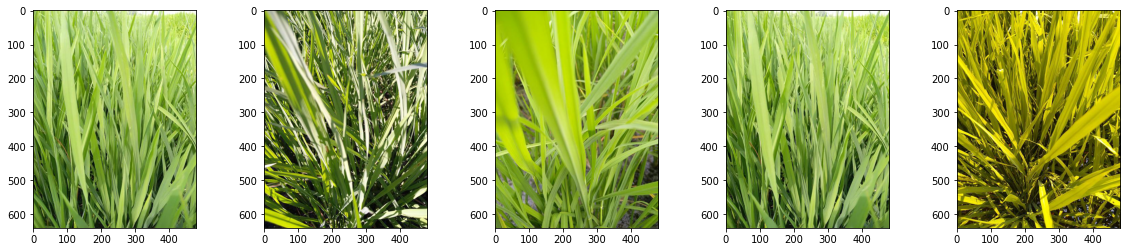

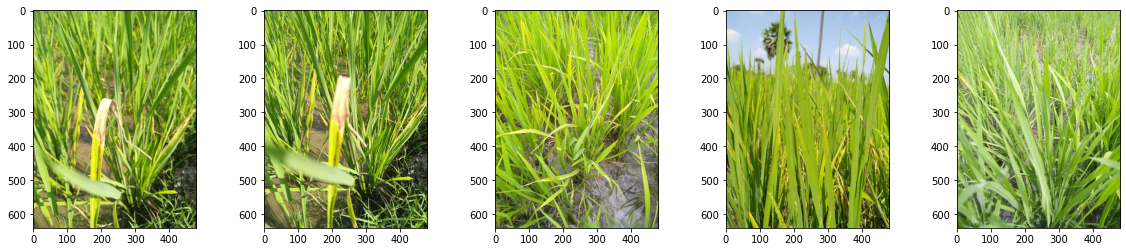

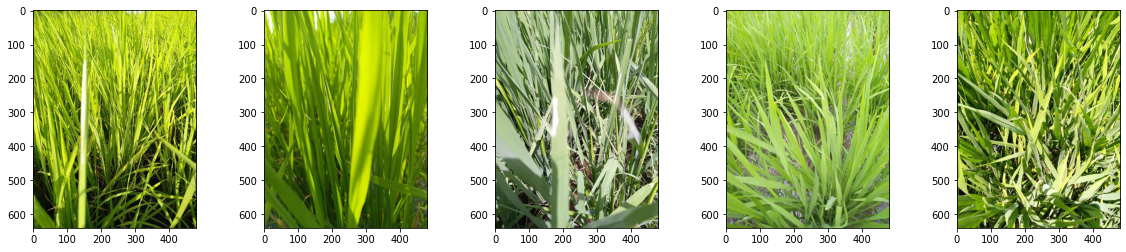

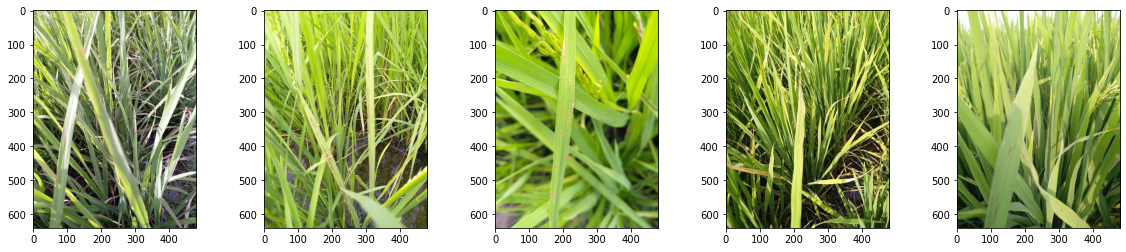

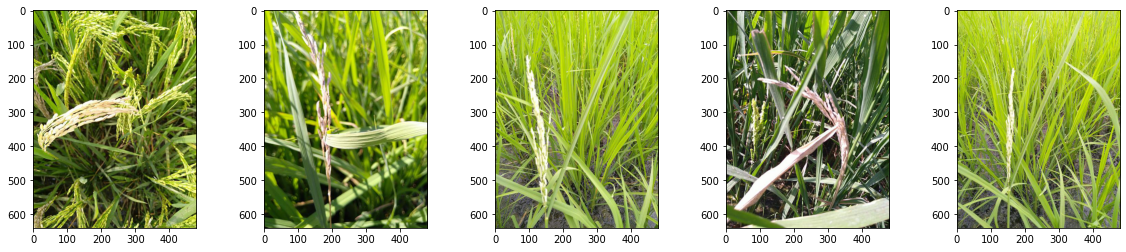

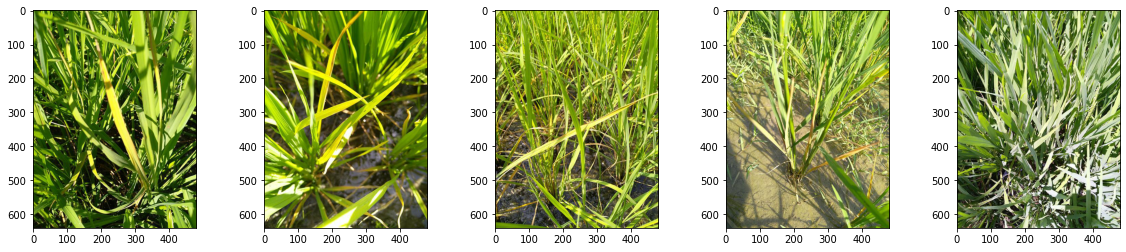

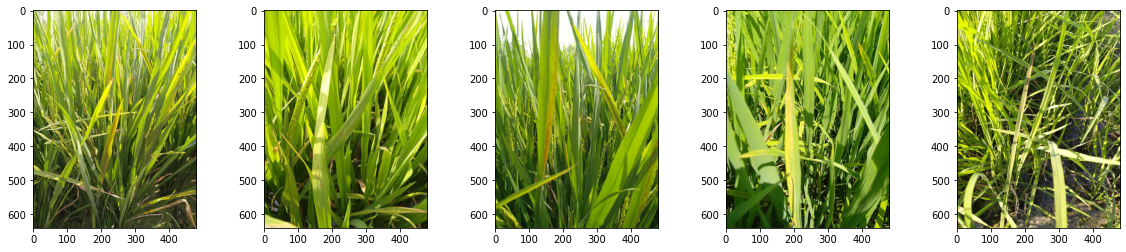

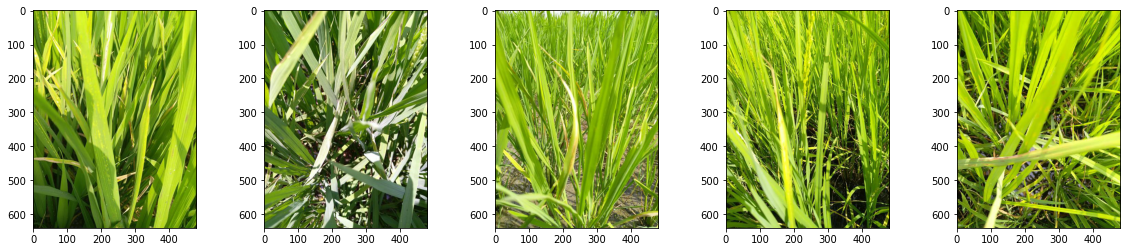

In [17]:
for y in listdir_image:
  print(y)
  z = os.path.join(image_dir,y)
  img_cls = os.listdir(z)
  plt.figure(figsize = (20,4))
  for i, path_img in enumerate(img_cls[:5]):
    plotsub = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(z, path_img))
    plt.imshow(img)
  plt.show

In [7]:
train = pd.read_csv('/content/paddy-disease-classification/train.csv')

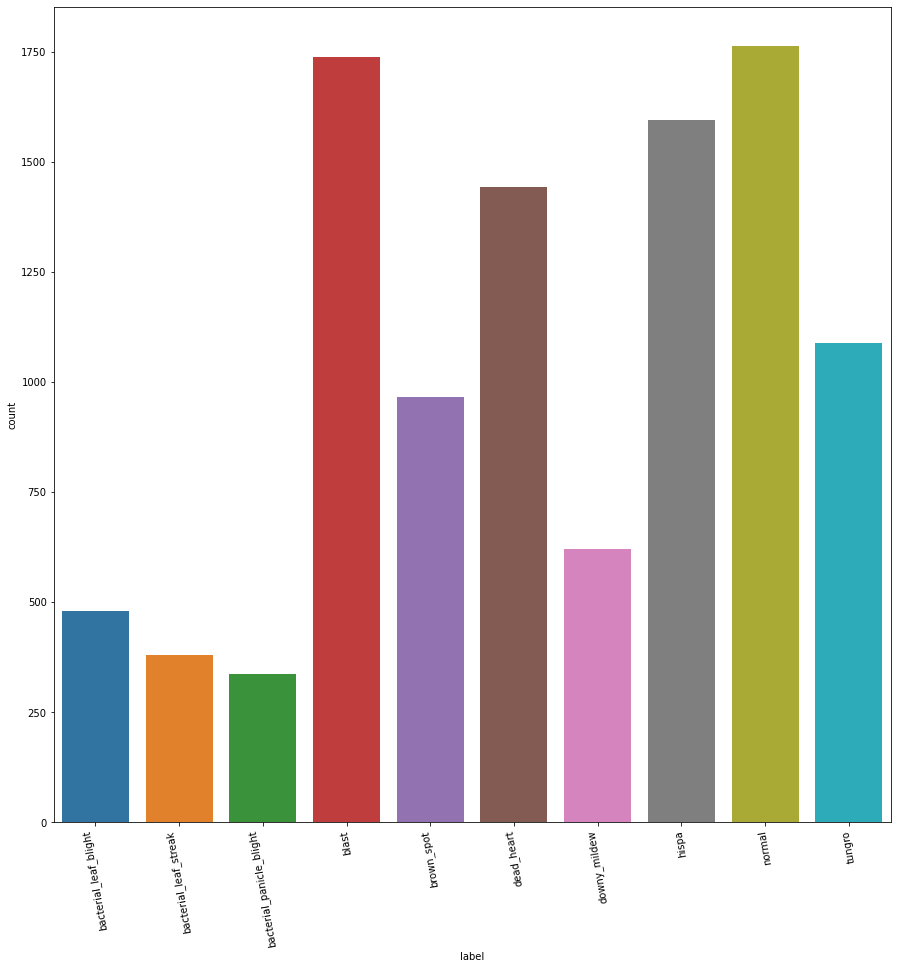

In [15]:
plt.figure(figsize=(15,15))
sb.countplot(data=train, x='label')
plt.xticks(rotation = 100)
plt.show()